## Goal
The code provided aims to compare the derivative of the function defined as :
$f(x) = log(sin(x)) + x^2cos(x)$

The derivative will be computed using three different methods:

1-Automatic differentiation using dual numbers

2-Analytic method

3-Numerical method

## Implementation

Make sure to run 'pip install -r requirements.txt' and 'pip install -e .' from the dual_autodiff folder in your kernel environment to install the necessary libraries for running this notebook (refer to the README for more details).

In [1]:
#Import the packages installed in your environment
import matplotlib.pyplot as plt
import dual_autodiff as df
import numpy as np
import time
import functools

Defining a time decorator to compute the execution time of the functions

In [2]:
def time_decorator(func):
    """
    A decorator to compute the execution time of each function, and help compare their performances.
    """
    @functools.wraps(func)
    def wrapper(*args,**kwargs):
        print("Executing: ",func.__name__)
        start=time.time()
        result=func(*args,**kwargs)
        end=time.time()
        print("Execution time for this function is: ", end-start)
        return result
    return wrapper

Defining the function f(x) for which we want to compute the derivative using different methods.

In [3]:
def f(x):
    """
    The function for which we want to compute the derivatives using different methods.

    Parameters:
        x: value at which we want to compute the value of the function.

    Returns: 
        The function f(x) evaluated at x.
    """
    return np.log(np.sin(x))+x**2*np.cos(x)

Defining the functions to compute the derivatives of f(x) using different methods.

In [4]:
@time_decorator
def f_analytical(x):
    """
    The function that computes analytically the derivative of f(x).

    Parameters:
        x: value at which we want to compute the derivative.

    Returns:
        The analytic derivative of f(x) evaluated at x.
    """
    return (2*x*np.cos(x)+x**2*-np.sin(x)+(np.cos(x)/np.sin(x)))


def f_numerically(x,h):
    """
    The function that computes numerically the derivative of f(x).

    Parameters:
        x: value at which we want to compute the derivative.
        h: step size.

    Returns:
        The numerical derivative of f(x) evaluated at x.
    """
    return (f(x+h)-f(x))/h

@time_decorator
def f_AD(x):
    """
    The function that computes the derivative of f(x) using automatic differentiation.
    Please refer to the report for the logic behind automatic differentiation using dual numbers.

    Parameters:
        x: the value at which we want to compute the derivative.

    Returns:
        Derivative computed using dual numbers.
    """
    x1=df.Dual(x,1.0)
    result=(x1.cos()*x1.square() + (x1.sin()).log())
    return result.dual

Visualising the results of the derivatives of f(x) evaluated at 1.5

In [5]:
result_dual=f_AD(1.5)
result_analytical=f_analytical(1.5)
result_numerically=f_numerically(1.5,1e-10)
print("Derivative of f(x) using dual numbers is ", result_dual)
print("Analytical derivative of f(x)  is ", result_analytical)
print("Numerical derivative of f(x), with step size= 1e-10 is ",result_numerically)

Executing:  f_AD
Execution time for this function is:  0.00017118453979492188
Executing:  f_analytical
Execution time for this function is:  2.384185791015625e-05
Derivative of f(x) using dual numbers is  -1.9612372705533612
Analytical derivative of f(x)  is  -1.9612372705533612
Numerical derivative of f(x), with step size= 1e-10 is  -1.9612378387989793


Plotting the differences between the analytical and numerical derivatives for different step sizes

In [10]:
def numerical_values():
    """
    A function that plots the analytical and numerical derivatives for different step sizes h.
    """
    numerical_results=[]
    step_size = [1,0.5,0.01,0.001,0.0001,0.00001,0.000001,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17,1e-18]
    #Numerical derivatives for different step sizes
    for h in step_size:
        numerical_results.append(f_numerically(1.5,h))
    #Plots
    plt.plot(step_size,numerical_results,label="Numerical derivative")
    plt.axhline(y=result_analytical, color='r', label="Analytical derivative")
    plt.xlabel("Step size")
    plt.xscale('log')
    plt.ylabel("Numerical and analytical derivatives")
    plt.title("Analytical and Numerical Derivatives for Different Step Sizes")
    plt.grid()
    plt.legend()
    plt.show()

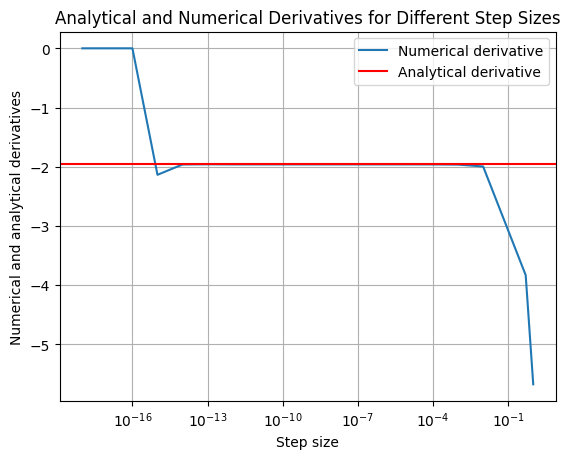

In [11]:
numerical_values()

Same plot as before, but zoomed in on the interval [1e-16, 1e-13].

In [12]:
def interval():
    """
    A function that plots the numerical derivative for step sizes h in the interval [1e-16,1e-13].
    """
    numerical_results=[]
    values = np.logspace(-16, -13, num=1000)
    #Numerical derivatives for different step sizes
    for h in values:
        numerical_results.append(f_numerically(1.5,h))
    #Plots
    plt.plot(values,numerical_results,label="Numerical derivative")
    plt.axhline(y=result_analytical, color='r', label="Analytical derivative")
    plt.xlabel("Step size")
    plt.xscale('log')
    plt.ylabel("Numerical derivatives")
    plt.title("Zoom on the Analytical and Numerical Derivatives for Different Step Sizes")
    plt.grid()
    plt.legend()
    plt.show()

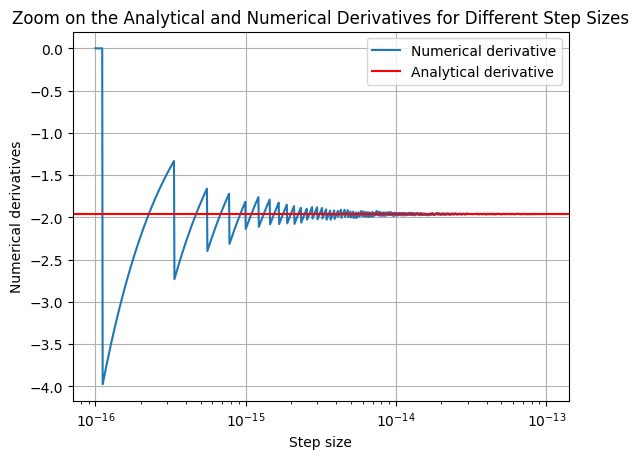

In [13]:
interval()